In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [3]:
import os
import sys
sys.path.append(
    os.path.normpath(
        os.path.join(os.getcwd(), '..')))

In [4]:
from src.objects import CameraView
from src.datasets.matterport3d.data import Matterport3dDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [41]:
paths = Matterport3dDataPaths(
    data_root='/Users/artonson/tmp/s4g/matterport/',
    scene_id='D7N2EKCX4Sj',
    room_id='20',
    chunk_id='*',
    type_id='cmp'
)

In [42]:
paths.load()

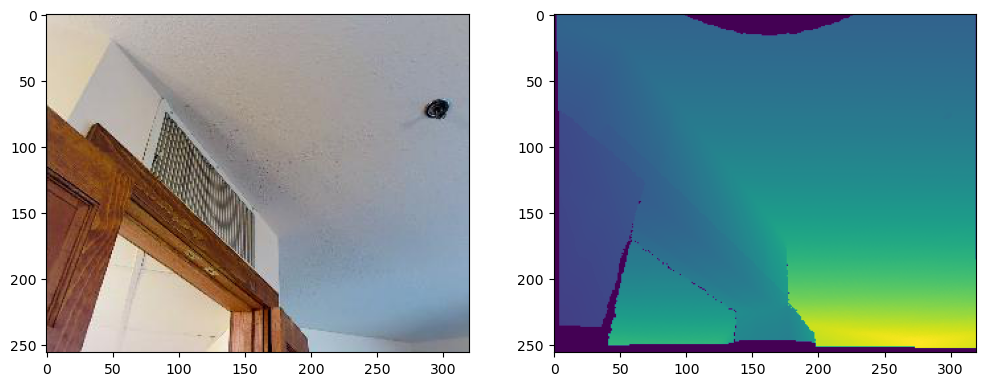

In [7]:
camera_view = CameraView.from_paths(paths, '5')

f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [8]:
camera_view.intrinsics

array([[268.367,   0.   , 157.355,   0.   ],
       [  0.   , 268.615, 126.59 ,   0.   ],
       [  0.   ,   0.   ,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

In [9]:
camera_view.line_length = 0.1

In [10]:
point_view = unproject_rgbd(camera_view)

In [11]:
point_view.depth

array([[ 9.24884816, -1.12590985,  2.39709254],
       [ 9.24770183, -1.12900947,  2.3971425 ],
       [ 9.24716542, -1.13170908,  2.39820072],
       ...,
       [10.77291378, -3.9040982 ,  2.35771156],
       [10.76716166, -3.91050735,  2.35688313],
       [10.76063279, -3.91596826,  2.35572878]])

In [43]:
camera_ids_to_check = None
association_file = '/Users/artonson/tmp/s4g/matterport/association/D7N2EKCX4Sj_room20.txt'
with open(association_file, 'r') as association_file:
    camera_ids_to_check = association_file.read().splitlines()

In [44]:
camera_views = [paths.camera_views[id_] for id_ in camera_ids_to_check]

In [45]:
for view in camera_views:
    view.line_length = 0.5

In [46]:
paths.scene_volume.plot_type = 'points'
paths.scene_volume.plot_sdf_thr = 1.0

In [47]:
_ = display_3d(
    paths.scene_volume,
    *camera_views,
#     PointsPlottable(
#         points=point_view.depth,
#         point_size=0.01,
#         point_colors=rgb_to_packed_colors(
#             point_view.rgb[:, 0],
#             point_view.rgb[:, 1],
#             point_view.rgb[:, 2],
#         ),
#     ),
#     point_view,
    height=1024
)

(4200957,)
(363296, 3)


Output()

In [5]:
from src.objects import CameraView
from src.datasets.scannet.data import ScannetDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [89]:
paths = ScannetDataPaths(
    data_root='/Users/artonson/tmp/s4g/scannet/',
    scene_id='scene0480',
    room_id='01',
    chunk_id='*',
    type_id='cmp'
)

In [90]:
paths.load()

/Users/artonson/repos/frustum_chunk_intersection/src/objects.py:76: UserWarning: Resizing RGB from (968, 1296, 3) to (480, 640)
  warnings.warn(f'Resizing RGB from {str(rgb_array.shape)} '


In [91]:
cameras, overlaps = [], []
output_file = '/Users/artonson/tmp/s4g/scannet/output/scene0480_room01__cmp__10.txt'
with open(output_file, 'r') as f:
    for line in f:
        camera, overlap = line.strip().split()
        cameras.append(camera)
        overlaps.append(float(overlap))
        
cameras = np.array(cameras)
overlaps = np.array(overlaps)

In [101]:
cameras

array(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180',
       '200', '220', '240', '260', '280', '300', '320', '340', '360',
       '380', '400', '420', '440', '460', '480', '500', '520', '540',
       '560', '580', '600'], dtype='<U3')

In [39]:
camera_ids_to_check = None
association_file = '/Users/artonson/tmp/s4g/scannet/association/scene0475_room01.txt'
with open(association_file, 'r') as association_file:
    camera_ids_to_check = association_file.read().splitlines()

In [93]:
# camera_views = [paths.camera_views[id_] for id_ in camera_ids_to_check]
# camera_views = [paths.camera_views[id_] for id_ in paths.camera_views]
camera_views = [paths.camera_views[c] for c, o in zip(cameras, overlaps) if o > 0.1]

In [94]:
for i, chunk_volume in enumerate(paths.chunk_volumes):
    if chunk_volume.id == '10': 
        print(i)

4


In [97]:
paths.scene_volume.plot_type = 'points'
paths.scene_volume.plot_sdf_thr = 1.0
paths.scene_volume.point_size = 0.02

chunk_volume = paths.chunk_volumes[4]
chunk_volume.plot_type = 'points'
chunk_volume.plot_sdf_thr = 1.0
chunk_volume.point_size = 0.02

for view in camera_views:
    view.line_length = 0.5

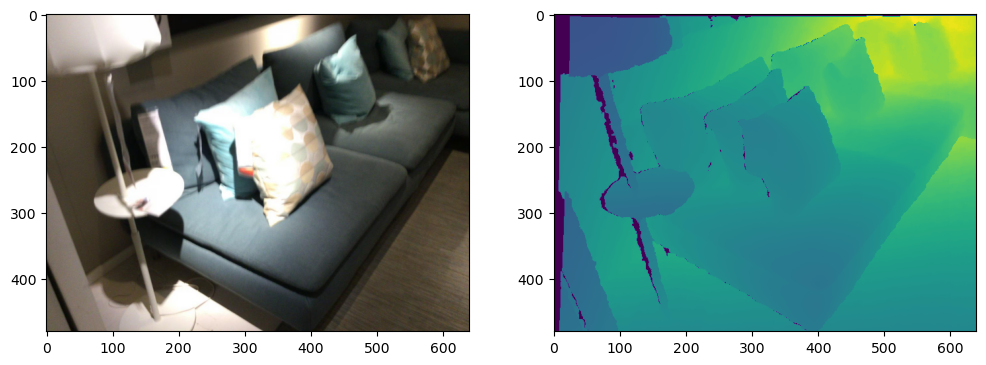

In [98]:
camera_view = paths.camera_views['0']
point_view = unproject_rgbd(camera_view)

f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [99]:
_ = display_3d(
    paths.scene_volume,
    chunk_volume,
    PointsPlottable(
        points=point_view.depth,
        point_size=0.01,
        point_colors=rgb_to_packed_colors(
            point_view.rgb[:, 0],
            point_view.rgb[:, 1],
            point_view.rgb[:, 2],
        ),
    ),
    *camera_views,
    height=1024
)

Output()